<a href="https://colab.research.google.com/github/jack-cao-623/python_learning/blob/main/understanding_code_snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sandbox/playground for understanding code snippets

In [1]:
# libraries needed
import numpy as np
import pandas as pd

## `.agg( )` method and `.assign( )` method
- .agg(desired_column_name_no_quotes = ('column_to_agg_in_quotes', 'agg_func_in_quotes')
- .assign(new_col_name_no_quotes = lambda x: ...)

In [2]:
chicago = pd.read_csv(
    'https://github.com/jack-cao-623/python_learning/blob/main/pandas/chicago.csv?raw=true'
)

chicago.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$90744.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$84450.00
2,"AARON, KARINA",POLICE OFFICER,POLICE,$84450.00
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,$89880.00
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$106836.00


In [3]:
# convert Employee Annual Salary to numeric
chicago['Employee Annual Salary'] = chicago['Employee Annual Salary'].str.replace('$', '').astype('float')

chicago.head()

<ipython-input-3-3612f531a188>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chicago['Employee Annual Salary'] = chicago['Employee Annual Salary'].str.replace('$', '').astype('float')


,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,90744.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,84450.0
2,"AARON, KARINA",POLICE OFFICER,POLICE,84450.0
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,89880.0
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,106836.0


In [4]:
# average salary per department, without using .agg()
(
    chicago
      .groupby('Department')
      ['Employee Annual Salary']
      .mean()
      .reset_index()
      .sort_values('Employee Annual Salary', ascending = False)
)

,Department,Employee Annual Salary
13,DoIT,96727.294118
6,BUILDINGS,96313.738626
16,FIRE,95700.627306
5,BUDGET & MGMT,91989.230769
19,HUMAN RELATIONS,91065.750000
33,TREASURER,90526.227273
22,IPRA,90064.097561
25,MAYOR'S OFFICE,87571.499535
4,BOARD OF ETHICS,86697.333333
27,POLICE,86610.358583


In [5]:
# using .agg()
(
    chicago
      .groupby(['Department'])
      .agg(
          avg_annual_employee_salary = ('Employee Annual Salary', 'mean'),
          num_employees = ('Name', 'nunique')
      )
      .reset_index()
)

,Department,avg_annual_employee_salary,num_employees
0,ADMIN HEARNG,76829.846154,39
1,ANIMAL CONTRL,54977.498507,67
2,AVIATION,73619.429849,1521
3,BOARD OF ELECTION,56175.487179,117
4,BOARD OF ETHICS,86697.333333,9
5,BUDGET & MGMT,91989.230769,39
6,BUILDINGS,96313.738626,262
7,BUSINESS AFFAIRS,77443.587578,161
8,CITY CLERK,65803.414894,94
9,CITY COUNCIL,57684.466061,396


In [6]:
# Department | Total_Salary | Total_Num_Emp | Avg_Salary
(
    chicago
      .groupby(['Department'])                                  # for each department
      .agg(
          Total_Salary = ('Employee Annual Salary', 'sum'),     # total salary, summed up
          Total_Num_Emp = ('Name', 'nunique'),                  # number of employees
          Avg_Salary = ('Employee Annual Salary', 'mean')       # averaage salary
      )
      .reset_index()
      .assign(
          Avg_Salary_Computed = lambda x: x['Total_Salary'] / x['Total_Num_Emp'],    # calculate a new column based on existing
          Avg_Salary_Computed_Rounded = lambda x: x['Avg_Salary_Computed'].round(0)   
      )
      #.assign(
       #   
      #)
)

,Department,Total_Salary,Total_Num_Emp,Avg_Salary,Avg_Salary_Computed,Avg_Salary_Computed_Rounded
0,ADMIN HEARNG,2.996364e+06,39,76829.846154,76829.846154,76830.0
1,ANIMAL CONTRL,3.683492e+06,67,54977.498507,54977.498507,54977.0
2,AVIATION,1.119752e+08,1521,73619.429849,73619.429849,73619.0
3,BOARD OF ELECTION,6.572532e+06,117,56175.487179,56175.487179,56175.0
4,BOARD OF ETHICS,7.802760e+05,9,86697.333333,86697.333333,86697.0
5,BUDGET & MGMT,3.587580e+06,39,91989.230769,91989.230769,91989.0
6,BUILDINGS,2.523420e+07,262,96313.738626,96313.738626,96314.0
7,BUSINESS AFFAIRS,1.246842e+07,161,77443.587578,77443.587578,77444.0
8,CITY CLERK,6.185521e+06,94,65803.414894,65803.414894,65803.0
9,CITY COUNCIL,2.284305e+07,396,57684.466061,57684.466061,57684.0


## `.query( )` method
- input a string
- quotes around column values but not around column name

In [7]:
chicago.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,90744.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,84450.0
2,"AARON, KARINA",POLICE OFFICER,POLICE,84450.0
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,89880.0
4,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,106836.0


In [8]:
chicago.query('Department == "GENERAL SERVICES"')

,Name,Position Title,Department,Employee Annual Salary
3,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,89880.0
24,"ABDULLAH, RASHAD J",ELECTRICAL MECHANIC-AUTO-POLICE MTR MNT,GENERAL SERVICES,93600.0
100,"ACRES, ANTHONY E",CONSTRUCTION LABORER,GENERAL SERVICES,81536.0
136,"ADAMS, MICHAEL J",WATCHMAN,GENERAL SERVICES,44824.0
279,"AKHTAR, SYED J",OPERATING ENGINEER-GROUP A,GENERAL SERVICES,98675.2
...,...,...,...,...
32018,"ZUCKER, MICHAEL J",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,94328.0
32032,"ZUNIGA JR, JAMES",GARAGE ATTENDANT,GENERAL SERVICES,47528.0
32042,"ZURAWSKI, JEFFREY",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,99528.0
32056,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,94328.0


## `to_frame( )` method

In [11]:
# number of rows per department
(
    chicago
      .groupby('Department')
      .size()
      .to_frame('num_rows')
      ['num_rows']
      #.sum()
)

Department
ADMIN HEARNG                39
ANIMAL CONTRL               67
AVIATION                  1521
BOARD OF ELECTION          117
BOARD OF ETHICS              9
BUDGET & MGMT               39
BUILDINGS                  262
BUSINESS AFFAIRS           161
CITY CLERK                  94
CITY COUNCIL               396
COMMUNITY DEVELOPMENT      208
CULTURAL AFFAIRS            74
DISABILITIES                28
DoIT                       102
FAMILY & SUPPORT           654
FINANCE                    577
FIRE                      4796
GENERAL SERVICES           930
HEALTH                     529
HUMAN RELATIONS             16
HUMAN RESOURCES             70
INSPECTOR GEN               57
IPRA                        82
LAW                        414
LICENSE APPL COMM            1
MAYOR'S OFFICE              86
OEMC                      1982
POLICE                   12618
POLICE BOARD                 2
PROCUREMENT                 83
PUBLIC LIBRARY             961
STREETS & SAN             21

In [12]:
chicago.shape[0]

# due to missing values in last row...from tutorial...deal with this later

32063

## `.rank( ) method`

https://dfrieds.com/data-analysis/rank-method-python-pandas.html#:~:text=The%20method%3D'min'%20argument,()%20window%20function%20in%20SQL.

- method = 'first' is like SQL ROW_NUMBER()
- method = 'min' is like SQL RANK()
  - ties are given the same rank, but next rank is skipped
- method = 'dense' is like SQL DENSE_RANK()
  - ties are given teh same rank, but no skipping
- pct = True is like SQL NTILE(100)

In [13]:
# create a DataFrame
data = {'close_date': ["2012-08-01", "2012-08-01", "2012-08-01", "2012-08-02", "2012-08-03", "2012-08-04", "2012-08-05", "2012-08-07"],
        'seller_name': ["Lara", "Julia", "Julia", "Emily", "Julia", "Lara", "Julia", "Julia"]
       }

df = pd.DataFrame(data)

# sort rows
df = df.sort_values(by = ['seller_name', 'close_date'])

# convert close_date to datetime
df['close_date'] = pd.to_datetime(df['close_date'])

df

,close_date,seller_name
3,2012-08-02,Emily
1,2012-08-01,Julia
2,2012-08-01,Julia
4,2012-08-03,Julia
6,2012-08-05,Julia
7,2012-08-07,Julia
0,2012-08-01,Lara
5,2012-08-04,Lara


In [14]:
# for each seller_name, rank order the closing in order from earliest close_date to latest close_date

df['by_seller_name_earliest_first'] = (
    df
      .groupby('seller_name')
      ['close_date']
      .rank(method = 'first')        
)

df

# within Julia, two sales on 2012-08-01, but one gets a rank of 1.0 and the other gets a rank of 2.0
# this is like SQL ROW_NUMBER()

,close_date,seller_name,by_seller_name_earliest_first
3,2012-08-02,Emily,1.0
1,2012-08-01,Julia,1.0
2,2012-08-01,Julia,2.0
4,2012-08-03,Julia,3.0
6,2012-08-05,Julia,4.0
7,2012-08-07,Julia,5.0
0,2012-08-01,Lara,1.0
5,2012-08-04,Lara,2.0


In [15]:
df['by_seller_name_latest_first'] = (
    df
      .groupby('seller_name')
      ['close_date']
      .rank(method = 'first', ascending = False)    # akin to SQL ROW_NUMBER()
)

df

,close_date,seller_name,by_seller_name_earliest_first,by_seller_name_latest_first
3,2012-08-02,Emily,1.0,1.0
1,2012-08-01,Julia,1.0,4.0
2,2012-08-01,Julia,2.0,5.0
4,2012-08-03,Julia,3.0,3.0
6,2012-08-05,Julia,4.0,2.0
7,2012-08-07,Julia,5.0,1.0
0,2012-08-01,Lara,1.0,2.0
5,2012-08-04,Lara,2.0,1.0


In [16]:
(
    df[df['seller_name'] == 'Julia']
      .groupby('seller_name')
      ['close_date']
      .rank(method = 'min', ascending = False)
)

1    4.0
2    4.0
4    3.0
6    2.0
7    1.0
Name: close_date, dtype: float64

In [17]:
# another dataset
class_quiz_data = {'name': ["Jamie", "Joe", "Jake", "Jill", "James", "Dan", "Joy", "Jared", "Jill", "Jaime", "Jay"],
                   'score': [80, 85, 74, 100, 98, 91, 89, 90, 65, 84, 85]
                  }
df_quiz_scores = pd.DataFrame(class_quiz_data)

df_quiz_scores

,name,score
0,Jamie,80
1,Joe,85
2,Jake,74
3,Jill,100
4,James,98
5,Dan,91
6,Joy,89
7,Jared,90
8,Jill,65
9,Jaime,84


In [18]:
df_quiz_scores = df_quiz_scores.sort_values(by = 'score', ascending = False).reset_index(drop = True)
df_quiz_scores

,name,score
0,Jill,100
1,James,98
2,Dan,91
3,Jared,90
4,Joy,89
5,Joe,85
6,Jay,85
7,Jaime,84
8,Jamie,80
9,Jake,74


In [19]:
df_quiz_scores['score'].rank(pct = True)

0     1.000000
1     0.909091
2     0.818182
3     0.727273
4     0.636364
5     0.500000
6     0.500000
7     0.363636
8     0.272727
9     0.181818
10    0.090909
Name: score, dtype: float64

## Data viz

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [21]:
# import data
titanic_train = pd.read_csv(
    'https://raw.githubusercontent.com/jack-cao-623/python_learning/main/understanding_code_snippets/titanic_train.csv'
)

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# number of rows and columns
titanic_train.shape

# 891 rows, 12 columns

(891, 12)

In [24]:
# data type of each column and number of missing
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### heatmap for visualizing missingness

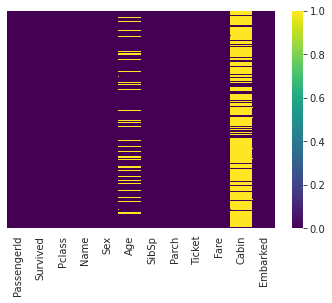

In [49]:
# visualize entire DataFrame and which cells are missing
sns.heatmap(
    titanic_train.isnull(),    # same dimensions as DataFrame; True for isnull and False for not is null
    yticklabels = False,       # remove y-axis tick labels
    #cbar = False,              # remove color bar
    cmap = 'viridis'
)

# 1 = yellow = True, is null
# 0 = purple = False, not null

# Age and Cabin have high number of missing values

# implications for how to deal with missing values for ML/model building

### countplot

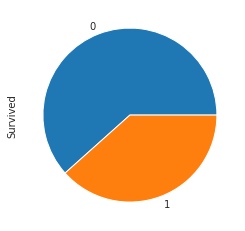

In [50]:
# number of people who survived (1) vs. not (0)
titanic_train['Survived'].value_counts(normalize = True).plot(kind = 'pie')

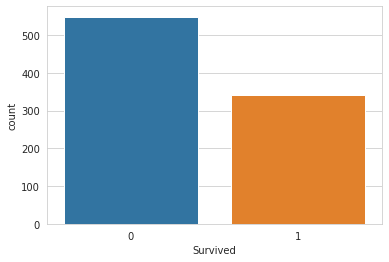

In [51]:
# alternatively:
sns.countplot(x = 'Survived', data = titanic_train)

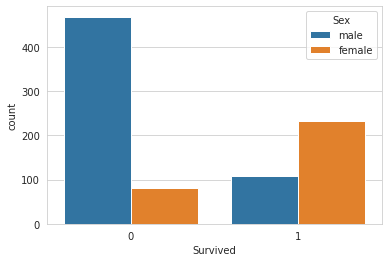

In [52]:
# number that survived (1) or not (0), cut by Sex
sns.countplot(
    x = 'Survived', 
    hue = 'Sex', 
    data = titanic_train
)

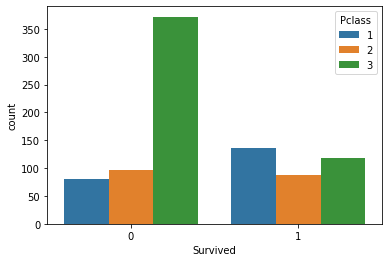

In [42]:
# Survived (1) or not (0), cut be Pclass, Passenger class
sns.countplot(
    x = 'Survived', 
    hue = 'Pclass', 
    data = titanic_train
)

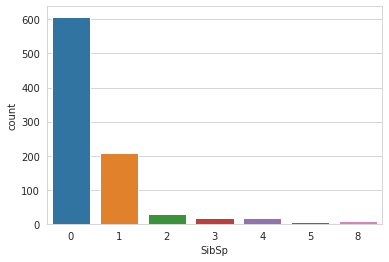

In [55]:
# number spouses or siblings
sns.countplot(
    x = 'SibSp', 
    data = titanic_train
)

### histograms

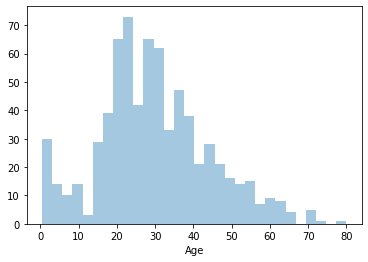

In [46]:
# Age distribution
sns.distplot(
    titanic_train['Age'], 
    bins = 30, 
    kde = False
)

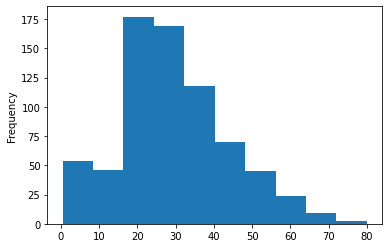

In [47]:
titanic_train['Age'].plot(kind = 'hist')

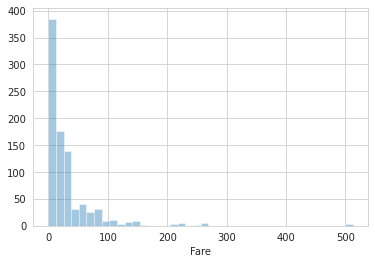

In [59]:
# ticket price
sns.distplot(
    titanic_train['Fare'],
    bins = 40, 
    kde = False
)